# Explore here

In [21]:
# 0) Imports y paths
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

RAW = Path("../data/raw/internal-link.csv")

# 1) Carga
df = pd.read_csv(RAW)

# 2) Vista rápida
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
# Eliminar duplicados
df.drop("id", axis =1).duplicated().sum()

np.int64(0)

In [4]:
# Eliminar variables "inútiles"
df.drop(["id", "name","host_name", "latitude", "longitude"], axis = 1, inplace = True)
df.head()

,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,Private room,149,1,9,2018-10-19,0.21,6,365
1,2845,Manhattan,Midtown,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,4632,Manhattan,Harlem,Private room,150,3,0,NaN,NaN,1,365
3,4869,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,7192,Manhattan,East Harlem,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


<Axes: ylabel='neighbourhood_group'>

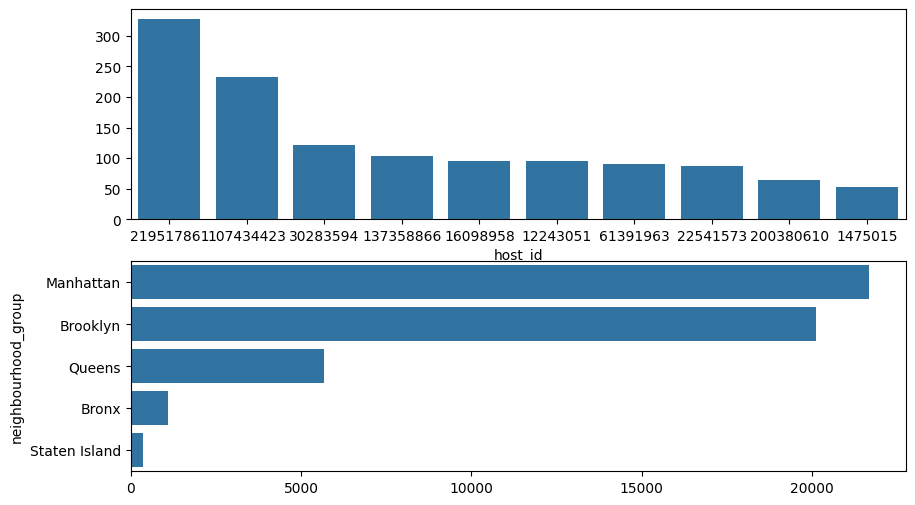

In [5]:
top_host = df["host_id"].value_counts().head(10)
top_neighbourhood_group = df["neighbourhood_group"].value_counts().head(10)
fig, axis = plt.subplots(2, 1, figsize = (10, 6))
sns.barplot(ax = axis[0], x = top_host.index.astype(str), y = top_host.values)
sns.barplot(ax = axis[1], x = top_neighbourhood_group.values, y = top_neighbourhood_group.index)

In [6]:
df["neighbourhood_group_n"] = pd.factorize(df["neighbourhood_group"])[0]
df.head()

,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_n
0,2787,Brooklyn,Kensington,Private room,149,1,9,2018-10-19,0.21,6,365,0
1,2845,Manhattan,Midtown,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,1
2,4632,Manhattan,Harlem,Private room,150,3,0,NaN,NaN,1,365,1
3,4869,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,0
4,7192,Manhattan,East Harlem,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,1


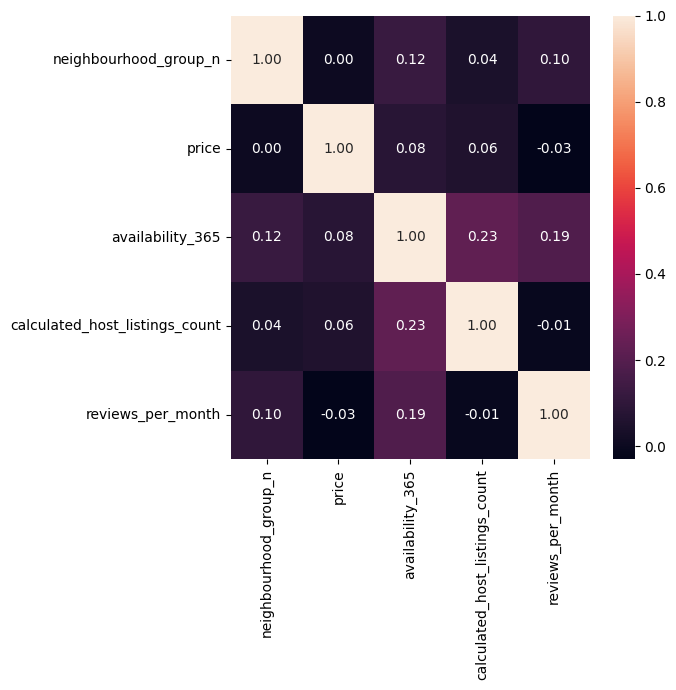

In [8]:
fig, axis = plt.subplots(figsize = (7, 7))

sns.heatmap(df[["neighbourhood_group_n", "price", "availability_365", "calculated_host_listings_count", "reviews_per_month"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

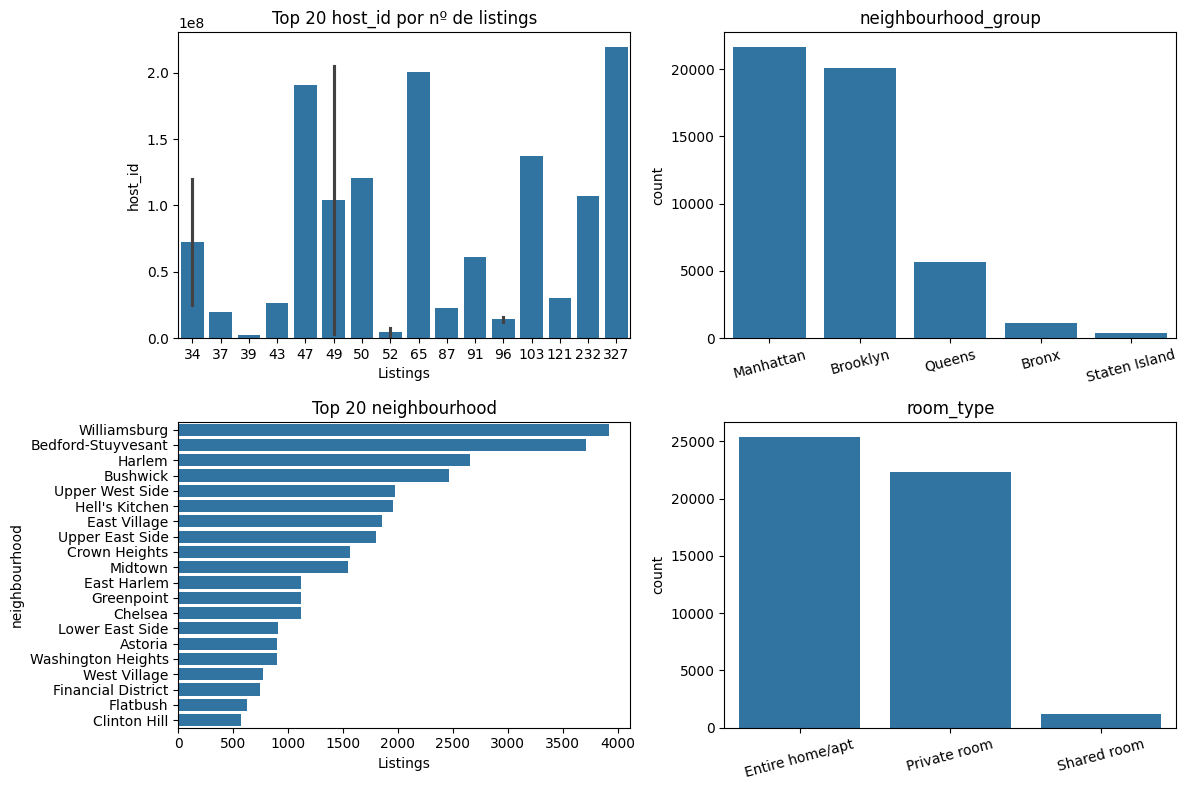

In [38]:
#    Devuelve un DataFrame con las n categorías más frecuentes de `col` y su recuento, con columnas [col, "count"].

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
(ax00, ax01), (ax10, ax11) = axes

# 1) host_id (Top 20 hosts con más listings)
top_hosts = top_count(df, "host_id", n=20)
sns.barplot(data=top_hosts, y="host_id", x="count", ax=ax00)
ax00.set_title("Top 20 host_id por nº de listings")
ax00.set_xlabel("Listings")
ax00.set_ylabel("host_id")

# 2) Agrupación por neighbourhood_group 
sns.countplot(data=df, x="neighbourhood_group", ax=ax01, order=df["neighbourhood_group"].value_counts().index)
ax01.set_title("neighbourhood_group")
ax01.set_xlabel("")
ax01.tick_params(axis="x", rotation=15)

# 3) Top 20 barrios
top_neigh = top_count(df, "neighbourhood", n=20)
sns.barplot(data=top_neigh, y="neighbourhood", x="count", ax=ax10)
ax10.set_title("Top 20 neighbourhood")
ax10.set_xlabel("Listings")
ax10.set_ylabel("neighbourhood")

# 4) room_type (3–4 categorías -> countplot directo)
sns.countplot(data=df, x="room_type", ax=ax11, order=df["room_type"].value_counts().index)
ax11.set_title("room_type")
ax11.set_xlabel("")
ax11.tick_params(axis="x", rotation=15)

plt.tight_layout()
plt.show()

In [ ]:
# 3) Duplicados (por id)
if "id" in df.columns:
    print("Duplicados por id:", df["id"].duplicated().sum())

# 4) Descriptivas de numéricas
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
display(df[num_cols].describe(percentiles=[.01,.05,.25,.5,.75,.95,.99]).T)


,count,mean,std,min,1%,5%,25%,50%,75%,95%,99%,max
host_id,48895.0,6.762001e+07,7.861097e+07,2438.00,100692.20,815564.10,7822033.00,30793816.00,1.074344e+08,2.417646e+08,2.677118e+08,274321313.0
price,48895.0,1.527207e+02,2.401542e+02,0.00,30.00,40.00,69.00,106.00,1.750000e+02,3.550000e+02,7.990000e+02,10000.0
minimum_nights,48895.0,7.029962e+00,2.051055e+01,1.00,1.00,1.00,1.00,3.00,5.000000e+00,3.000000e+01,4.500000e+01,1250.0
number_of_reviews,48895.0,2.327447e+01,4.455058e+01,0.00,0.00,0.00,1.00,5.00,2.400000e+01,1.140000e+02,2.140000e+02,629.0
reviews_per_month,38843.0,1.373221e+00,1.680442e+00,0.01,0.02,0.04,0.19,0.72,2.020000e+00,4.640000e+00,7.195800e+00,58.5
calculated_host_listings_count,48895.0,7.143982e+00,3.295252e+01,1.00,1.00,1.00,1.00,1.00,2.000000e+00,1.500000e+01,2.320000e+02,327.0
availability_365,48895.0,1.127813e+02,1.316223e+02,0.00,0.00,0.00,0.00,45.00,2.270000e+02,3.590000e+02,3.650000e+02,365.0


In [29]:
# 6) Categóricas clave
cat_cols = ["neighbourhood_group","neighbourhood","room_type"]
for c in cat_cols:
    if c in df.columns:
        display(df[c].value_counts(dropna=False).to_frame("count"))
 

,count
neighbourhood_group,
Manhattan,21661
Brooklyn,20104
Queens,5666
Bronx,1091
Staten Island,373


,count
neighbourhood,
Williamsburg,3920
Bedford-Stuyvesant,3714
Harlem,2658
Bushwick,2465
Upper West Side,1971
...,...
Richmondtown,1
Fort Wadsworth,1
New Dorp,1


,count
room_type,
Entire home/apt,25409
Private room,22326
Shared room,1160


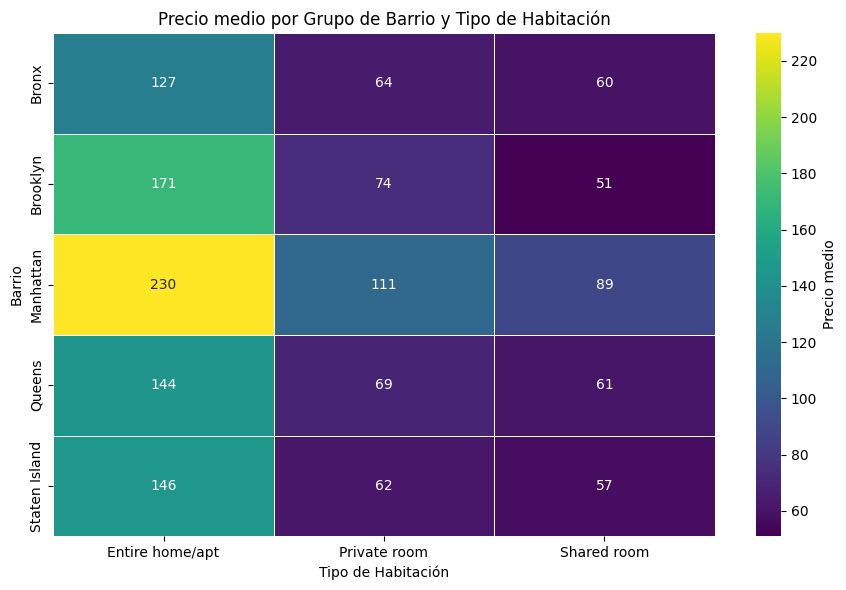

In [ ]:
heat_df = (
    df
    .pivot_table(
        index="neighbourhood_group",
        columns="room_type",
        values="price",
        aggfunc="mean"
    )
    .round(0)   # redondeo
)

# 2) Heatmap 
plt.figure(figsize=(9, 6))
ax = sns.heatmap(
    heat_df,
    annot=True,       # números en las celdas
    fmt=".0f",        
    linewidths=.5,
    cmap="viridis",    # paleta de colores
    cbar_kws={"label": "Precio medio"}
)
ax.set_xlabel("Tipo de Habitación")
ax.set_ylabel("Barrio")
ax.set_title("Precio medio por Grupo de Barrio y Tipo de Habitación")
plt.tight_layout()
plt.show()

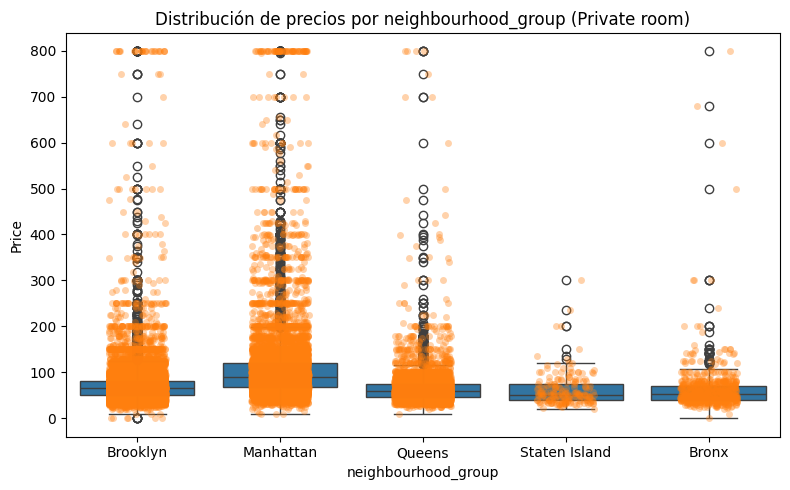

In [17]:
sub = df[df["room_type"].str.lower() == "private room"].copy()

# (Opcional) ordena los grupos por su precio medio
order = (
    sub.groupby("neighbourhood_group")["price"]
       .mean()
       .sort_values(ascending=False)
       .index
)

plt.figure(figsize=(8,5))
sns.boxplot(data=sub, x="neighbourhood_group", y="price")
sns.stripplot(data=sub, x="neighbourhood_group", y="price", alpha=0.35, jitter=0.2)
plt.xlabel("neighbourhood_group")
plt.ylabel("Price")
plt.title("Distribución de precios por neighbourhood_group (Private room)")
plt.tight_layout()

In [9]:
# Limpieza mínima reproducible

df["last_review"] = pd.to_datetime(df["last_review"], errors="coerce")
# Imputación informada de reviews_per_month
df["reviews_per_month"] = np.where(
    (df["number_of_reviews"]==0) & (df["reviews_per_month"].isna()),
    0,
    df["reviews_per_month"]
)

# Cap de outliers (usa percentiles calculados en el EDA)
p99_price = df["price"].quantile(0.99)
df["price"] = df["price"].clip(lower=0, upper=p99_price)

p99_min_nights = df["minimum_nights"].quantile(0.99)
df["minimum_nights"] = df["minimum_nights"].clip(lower=1, upper=p99_min_nights)

# Feature engineering opcional para EDA/modelo
df["days_since_last_review"] = (pd.Timestamp("2019-12-31") - df["last_review"]).dt.days
df["days_since_last_review"] = df["days_since_last_review"].fillna(df["days_since_last_review"].max())

# Columnas que NO usaremos para modelos (pero sí puedes conservar para EDA)
drop_for_model = ["id","name","host_name"]  # evalúa si también host_id


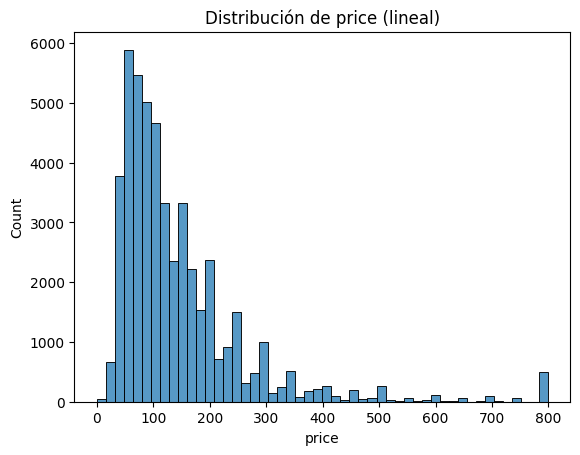

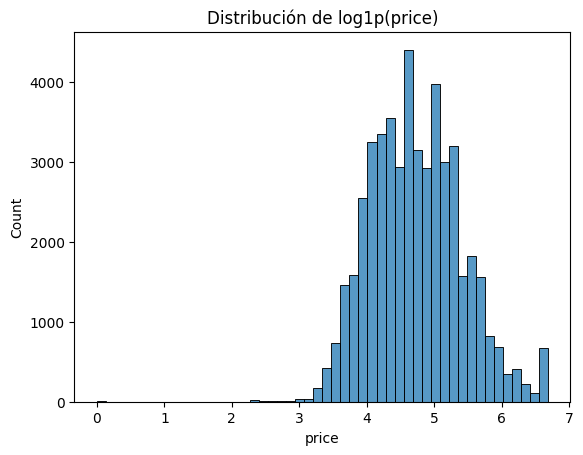

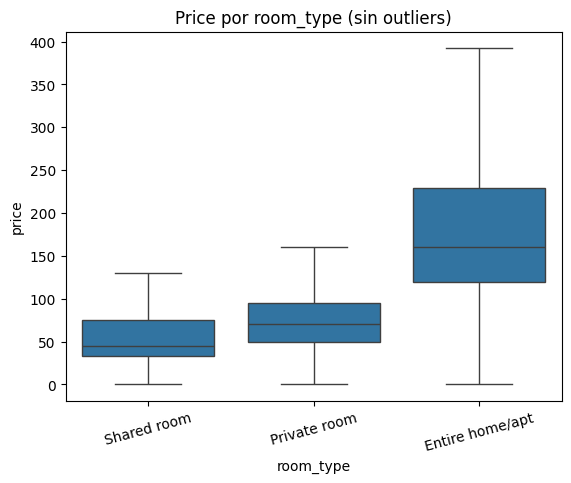

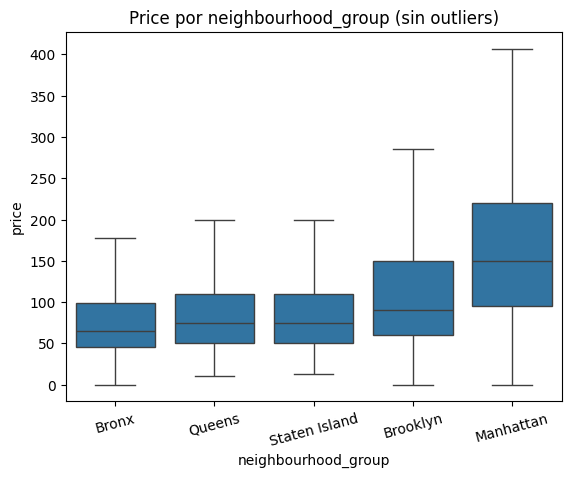

In [10]:
# Hist lineal
sns.histplot(df["price"].clip(lower=0), bins=50)
plt.title("Distribución de price (lineal)")
plt.show()

# Hist log
sns.histplot(np.log1p(df["price"].clip(lower=0)), bins=50)
plt.title("Distribución de log1p(price)")
plt.show()

# Box por room_type
if "room_type" in df.columns:
    sns.boxplot(data=df, x="room_type", y="price", showfliers=False,
                order=df.groupby("room_type")["price"].median().sort_values().index)
    plt.title("Price por room_type (sin outliers)")
    plt.xticks(rotation=15); plt.show()

# Box por neighbourhood_group
if "neighbourhood_group" in df.columns:
    sns.boxplot(data=df, x="neighbourhood_group", y="price", showfliers=False,
                order=df.groupby("neighbourhood_group")["price"].median().sort_values().index)
    plt.title("Price por neighbourhood_group (sin outliers)")
    plt.xticks(rotation=15); plt.show()

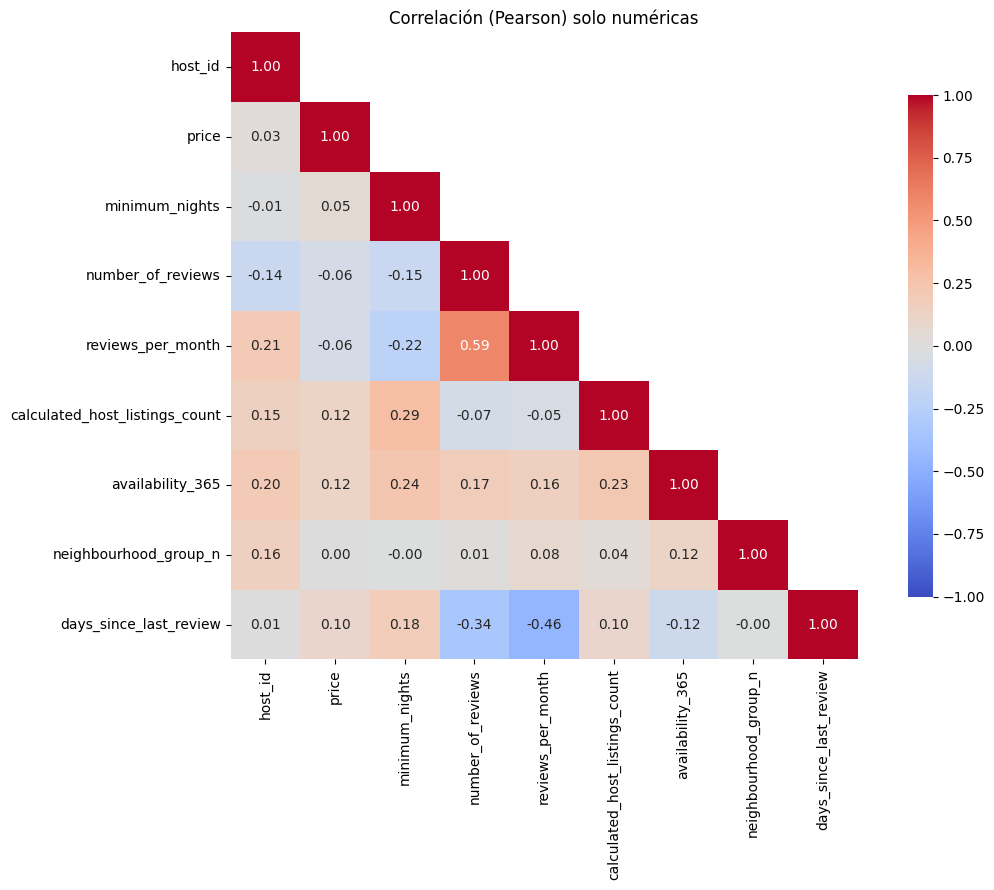

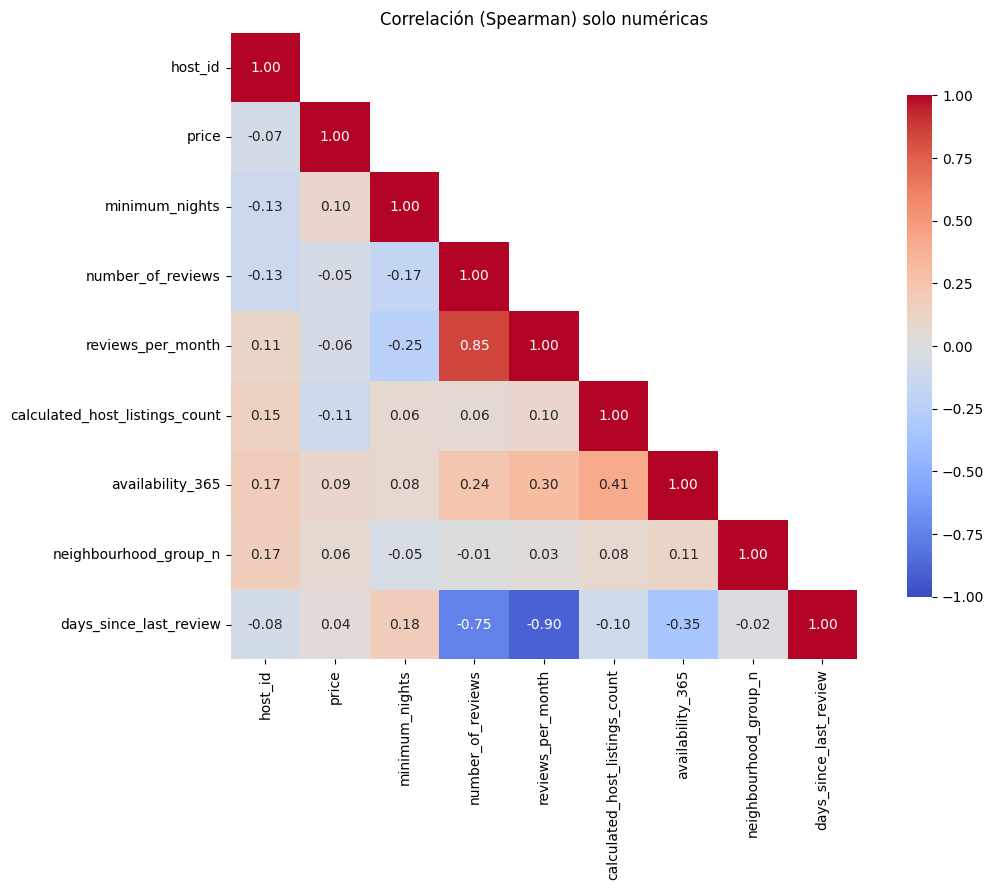

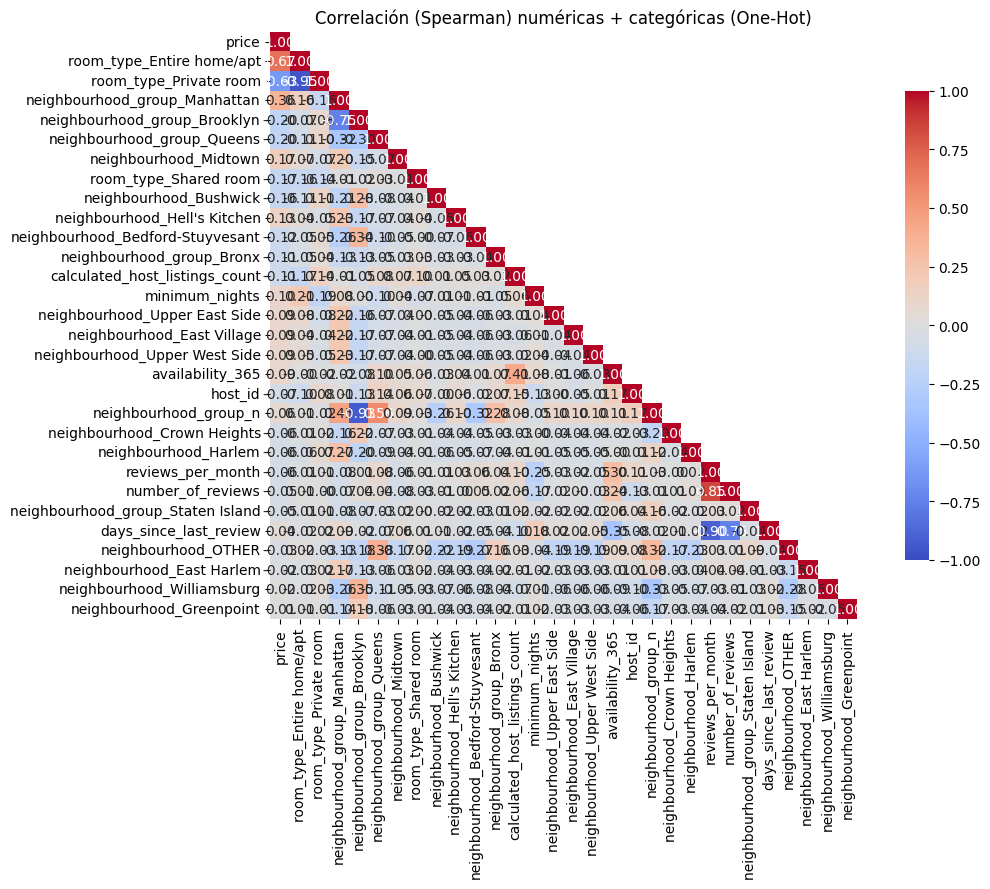

,var1,var2,|corr|,corr_signed
0,room_type_Private room,room_type_Entire home/apt,0.953470,-0.953470
1,neighbourhood_group_Brooklyn,neighbourhood_group_n,0.928786,-0.928786
2,days_since_last_review,reviews_per_month,0.901095,-0.901095
3,number_of_reviews,reviews_per_month,0.851558,0.851558
4,days_since_last_review,number_of_reviews,0.747058,-0.747058
5,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,0.745240,-0.745240
6,room_type_Entire home/apt,price,0.674588,0.674588
7,room_type_Private room,price,0.625539,-0.625539
8,neighbourhood_group_n,neighbourhood_group_Queens,0.563265,0.563265
9,neighbourhood_group_Manhattan,neighbourhood_group_n,0.446687,0.446687


In [11]:
Path("reports/figures").mkdir(parents=True, exist_ok=True)

# ==== Helper correcto para el heatmap
def plot_corr_heatmap(corr, title="Correlation heatmap", savepath=None, vmin=-1, vmax=1, show_values=True):
    """
    corr: matriz de correlación (DataFrame cuadrado)
    """
    # Enmascara triángulo superior para no duplicar
    mask = np.triu(np.ones_like(corr, dtype=bool), k=1)
    plt.figure(figsize=(12, 9))
    sns.heatmap(
        corr,
        mask=mask,
        annot=show_values,  # pon True si quieres números
        fmt=".2f",
        cmap="coolwarm",
        vmin=vmin, vmax=vmax,
        square=True,
        cbar_kws={"shrink": 0.8}
    )
    plt.title(title)
    plt.tight_layout()
    if savepath:
        Path(savepath).parent.mkdir(parents=True, exist_ok=True)
        plt.savefig(savepath, dpi=150)
    plt.show()

# ==== 1) Correlación solo numéricas (Pearson y Spearman)
num_cols = df.select_dtypes(include=[np.number]).columns
corr_num = df[num_cols].corr(method="pearson")
plot_corr_heatmap(corr_num, title="Correlación (Pearson) solo numéricas", savepath="reports/figures/corr_numeric.png")

corr_num_spearman = df[num_cols].corr(method="spearman")
plot_corr_heatmap(corr_num_spearman, title="Correlación (Spearman) solo numéricas", savepath="reports/figures/corr_numeric_spearman.png")

# ==== 2) Correlación incluyendo categóricas (One-Hot limitado)
cat_cols = df.select_dtypes(include=["object","category"]).columns.tolist()
K = 12  # máximo de categorías por variable para no explotar la matriz

df_enc = df.copy()
for c in cat_cols:
    top = df_enc[c].value_counts().nlargest(K).index
    df_enc[c] = np.where(df_enc[c].isin(top), df_enc[c], "OTHER")

df_oh = pd.get_dummies(df_enc[cat_cols], drop_first=False, dtype=int)

X_corr = pd.concat([df[num_cols], df_oh], axis=1)
const_cols = [c for c in X_corr.columns if X_corr[c].nunique() <= 1]
if const_cols:
    X_corr = X_corr.drop(columns=const_cols)

corr_full = X_corr.corr(method="spearman")
if "price" in corr_full.columns:
    order = corr_full["price"].abs().sort_values(ascending=False).index
    corr_view = corr_full.loc[order, order]
else:
    corr_view = corr_full

plot_corr_heatmap(corr_view, title="Correlación (Spearman) numéricas + categóricas (One-Hot)", 
                  savepath="reports/figures/corr_full_onehot.png")

# ==== (Opcional) Top pares más correlacionados
def top_corr_pairs(corr, topn=20, exclude_self=True):
    c = corr.copy()
    if exclude_self:
        np.fill_diagonal(c.values, np.nan)
    s = c.abs().unstack().dropna().sort_values(ascending=False)
    pairs, seen = [], set()
    for (a,b), v in s.items():
        key = tuple(sorted((a,b)))
        if key in seen: 
            continue
        seen.add(key)
        pairs.append((a,b,v, corr.loc[a,b]))
        if len(pairs) >= topn:
            break
    return pd.DataFrame(pairs, columns=["var1","var2","|corr|","corr_signed"])

top_pairs = top_corr_pairs(corr_view, topn=20)
display(top_pairs)